#Feature Selection and Model Definition

In [0]:
df = pd.read_csv("/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [0]:
# ____________________________________________________________________________________
# random forest feature classification
# ____________________________________________________________________________________

final_list = []
for i in X.columns:
    final_list.append(i)
# run feature selection using random forest
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier(random_state=7)
model = randomforest.fit(X,y)
from sklearn.feature_selection import SelectFromModel
threshold = 0.01
sfm = SelectFromModel(model, threshold = threshold)    
sfm.fit(X,y)
#for feature_list_index in sfm.get_support(indices = True):
    #print(X.columns[feature_list_index])
selected_featuress = pd.DataFrame(list(zip(X.columns,model.feature_importances_)), columns = ['predictor','Gini coefficient'])
selected_featuress = selected_featuress.sort_values(by = 'Gini coefficient', ascending = False)
selected_featuress.to_csv("image_features_ranked_clf.csv")

features_sorted_string = ""
for row in selected_featuress.values:
    features_sorted_string = features_sorted_string+""+str(row[0])+","
features_sorted_string = features_sorted_string[:-1]
features_sorted_arr = features_sorted_string.split(',')
filtered_features = selected_featuress[selected_featuress['Gini coefficient'] >= threshold]
filtered_features_sorted_string = ""
for row in filtered_features.values:
    filtered_features_sorted_string = filtered_features_sorted_string+""+str(row[0])+","
filtered_features_sorted_string = filtered_features_sorted_string[:-1]
filtered_features_sorted_arr = filtered_features_sorted_string.split(',')
# Create X with columns in decreasing order of their significance
X_filtered = X[filtered_features_sorted_arr]

In [17]:
pd.set_option('display.max_rows', None)
selected_featuress

,predictor,Gini coefficient
0,TotalCharges,0.182411
108,Contract_Month-to-month,0.039946
115,PaymentMethod_Electronic check,0.030185
90,OnlineSecurity_No,0.027512
88,InternetService_Fiber optic,0.026536
10,tenure_1,0.024219
99,TechSupport_No,0.022425
110,Contract_Two year,0.022347
1,gender_Female,0.018561
2,gender_Male,0.018330


In [23]:
import xgboost as xgb

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state = 5)

xgb = xgb.XGBClassifier()

xgb_model = xgb.fit(X_train,y_train)

preds = xgb.predict(X_test)

acc = (accuracy_score(y_test, preds))
recall = (recall_score(y_test,preds))
print(acc)
print(recall)

0.803010752688172
0.5219512195121951


#Model Explainer for XGBoost

In [0]:
! pip install shap

In [0]:
import shap

In [25]:
XGB_explainer = shap.TreeExplainer(xgb_model)
XGB_shap_values = XGB_explainer.shap_values(X)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


In [29]:
shap.initjs()
shap.force_plot(XGB_explainer.expected_value, XGB_shap_values[0,:], X.iloc[0,:])

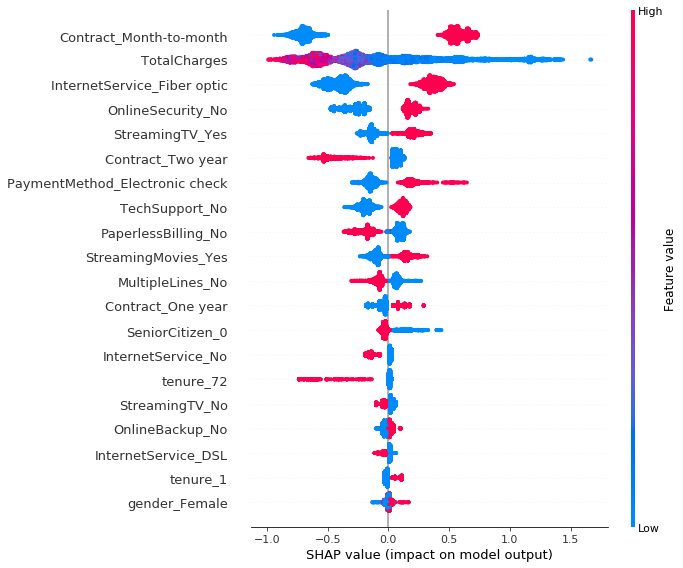

In [27]:
shap.initjs()
shap.summary_plot(XGB_shap_values, X)

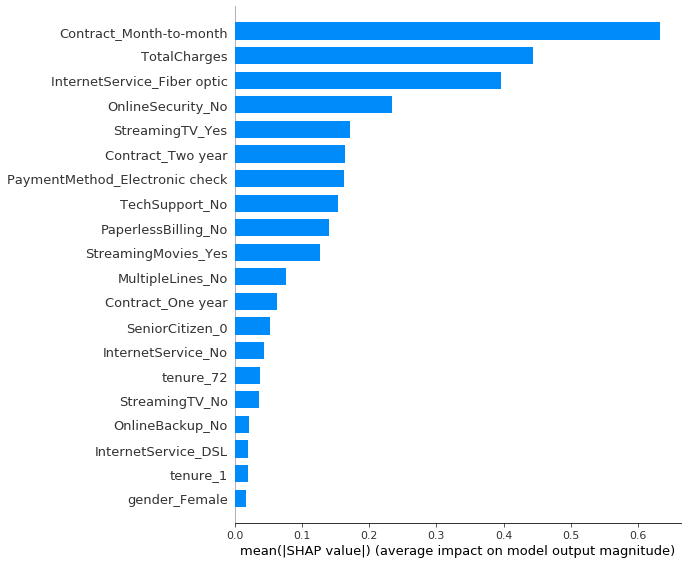

In [28]:
shap.initjs()
shap.summary_plot(XGB_shap_values, X, plot_type="bar")